In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import os

In [12]:
# Define file paths and output directory
file_paths = [
   "p01", "p02", "p03", "p04", "p05", "p06", "p07", "p08", "p09", "p10", "p11", "p12", 
]

days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]


In [24]:
for index in file_paths:
    car_file = f"/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/Neuer Ordner/{index}_done.npy_car_data.csv"
    occupency_file = f"/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/Neuer Ordner/{index}_done.npy_occupancy_data.csv"
    speed_file = f'/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/Neuer Ordner/{index}_done.npy_speed_data.csv'

    car = pd.read_csv(car_file)
    occupency = pd.read_csv(occupency_file)
    speed = pd.read_csv(speed_file)
    
    car = car.loc[:, ~car.T.duplicated()]
    print(car.shape)
    occupency = occupency.loc[:, ~occupency.T.duplicated()]
    print(occupency.shape)
    speed = speed.loc[:, ~speed.T.duplicated()]
    print(speed.shape)
    
    car_name = car.columns.to_list()
    occupency_name = occupency.columns.to_list()
    speed_name = speed.columns.to_list()
    
    np.save(f"/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p_einzelnt/{index}_car_node.npy", car_name)
    np.save(f"/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p_einzelnt/{index}_speed_node.npy", speed_name)
    np.save(f"/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p_einzelnt/{index}_occupency_node.npy", occupency_name)
    
    car_array = car.to_numpy()
    occupency_array = occupency.to_numpy()
    speed_array = speed.to_numpy()
    
    np.save(f"/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p_einzelnt/{index}_car.npy", car_array)
    np.save(f"/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p_einzelnt/{index}_occupency.npy", occupency_array)
    np.save(f"/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p_einzelnt/{index}_speed.npy", speed_array)
    print(f"Node {index} saved")
        # Gemeinsame Spalten identifizieren
    common_columns = list(set(car.columns) & set(occupency.columns) & set(speed.columns))
    
    print(len(common_columns))

    # DataFrames auf gemeinsame Spalten reduzieren
    car = car[common_columns]
    occupency = occupency[common_columns]
    speed = speed[common_columns]

    # Sicherstellen, dass die Reihenfolge der Spalten gleich ist
    car = car.sort_index(axis=1)
    occupency = occupency.sort_index(axis=1)
    speed = speed.sort_index(axis=1)
    
    node_order = car.columns.to_list()
    np.save(f"/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p_data/{index}_node_order.npy", node_order)
    print(f"Node Order {index} saved")
    # Zu einem 3D-numpy-Array konvertieren
    car_array = car.to_numpy()
    occupency_array = occupency.to_numpy()
    speed_array = speed.to_numpy()

    # 3D-Stacking entlang der dritten Achse
    merged_array = np.stack([car_array, occupency_array, speed_array], axis=-1)

    # Numpy-Array speichern
    output_file = f"/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/archive/p_data/{index}_merged.npy"
    np.save(output_file, merged_array)
    print(f"Node {index} saved")

(8928, 12602)
(8928, 11626)
(8928, 8816)
Node p01 saved
(8064, 12674)
(8064, 11693)
(8064, 8844)
Node p02 saved
(8928, 12731)
(8928, 11721)
(8928, 8854)
Node p03 saved
(8640, 12623)
(8640, 11646)
(8640, 8830)
Node p04 saved
(8928, 12490)
(8928, 11549)
(8928, 8744)
Node p05 saved
(8640, 12281)
(8640, 11364)
(8640, 8617)
Node p06 saved
(8928, 12037)
(8928, 11089)
(8928, 8572)
Node p07 saved
(8928, 11725)
(8928, 10729)
(8928, 8205)
Node p08 saved
(8640, 12361)
(8640, 11359)
(8640, 8639)
Node p09 saved
(8928, 12372)
(8928, 11383)
(8928, 8639)
Node p10 saved
(8640, 12324)
(8640, 11338)
(8640, 8618)
Node p11 saved
(8928, 12437)
(8928, 11437)
(8928, 8712)
Node p12 saved


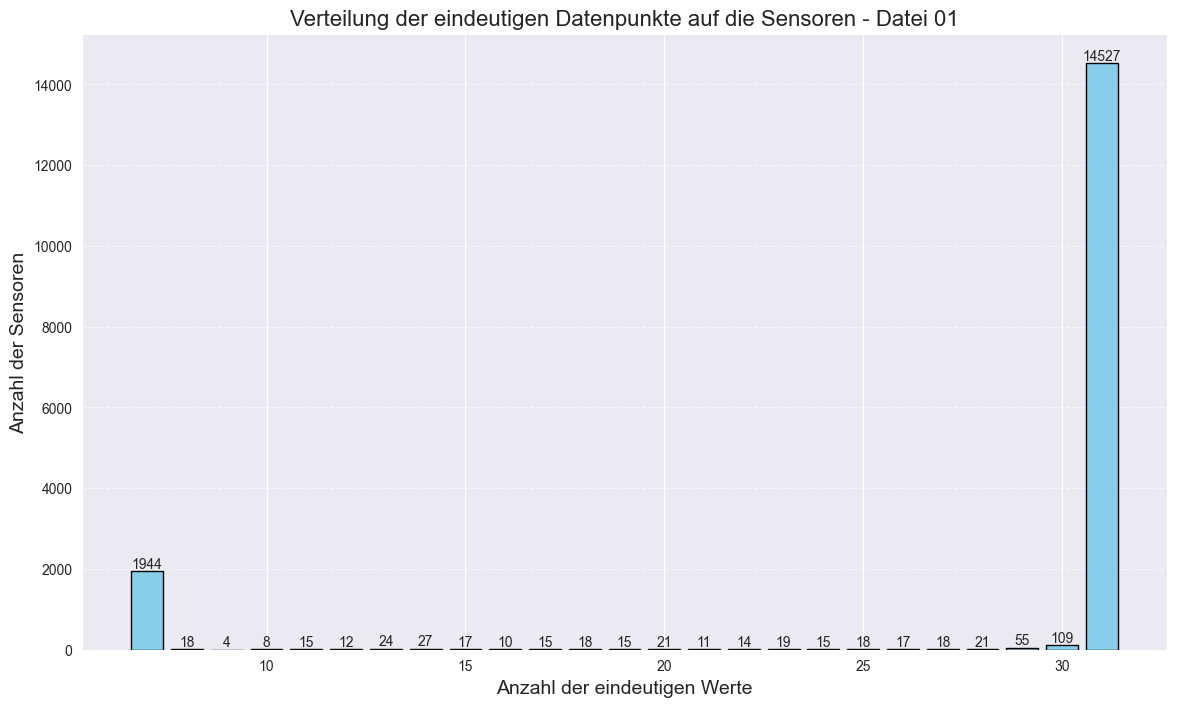

Processed and saved results for file 01


<Figure size 640x480 with 0 Axes>

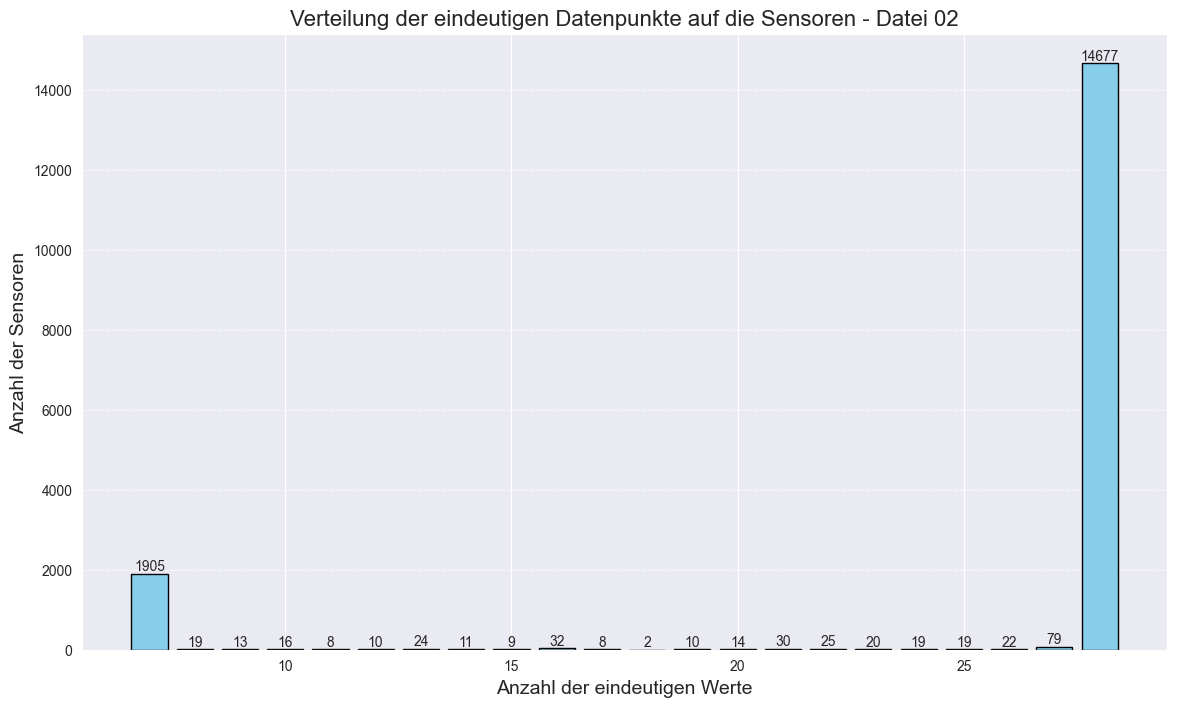

Processed and saved results for file 02


<Figure size 640x480 with 0 Axes>

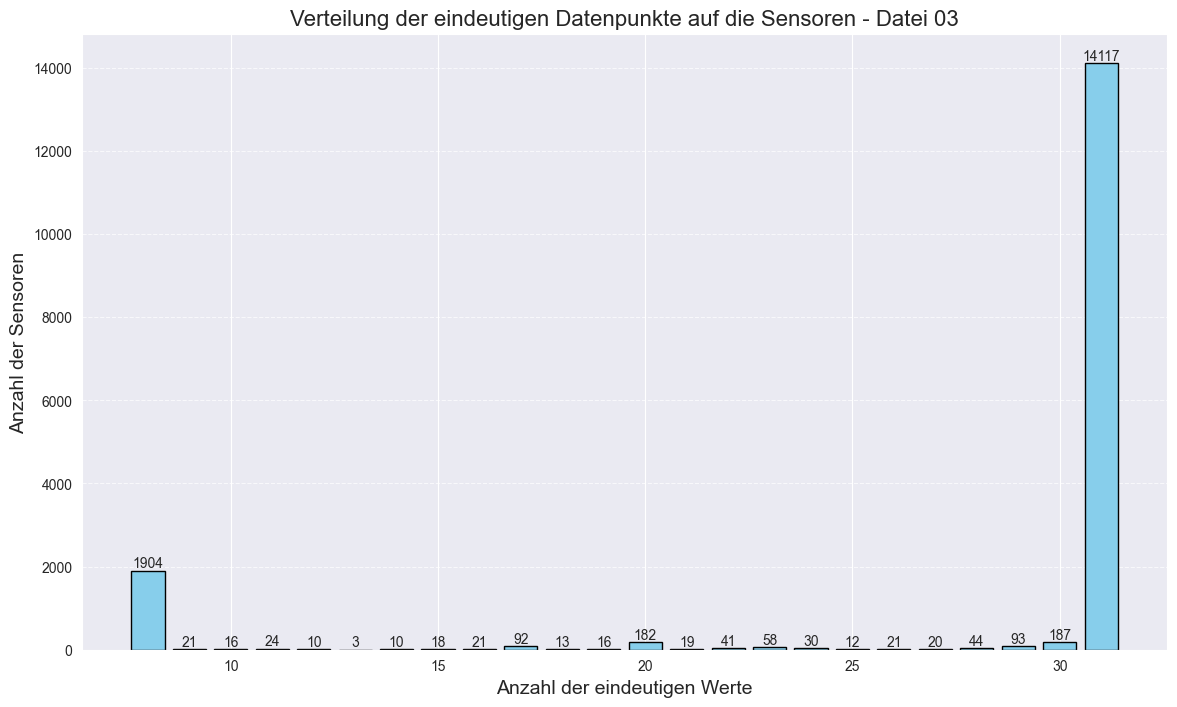

Processed and saved results for file 03


<Figure size 640x480 with 0 Axes>

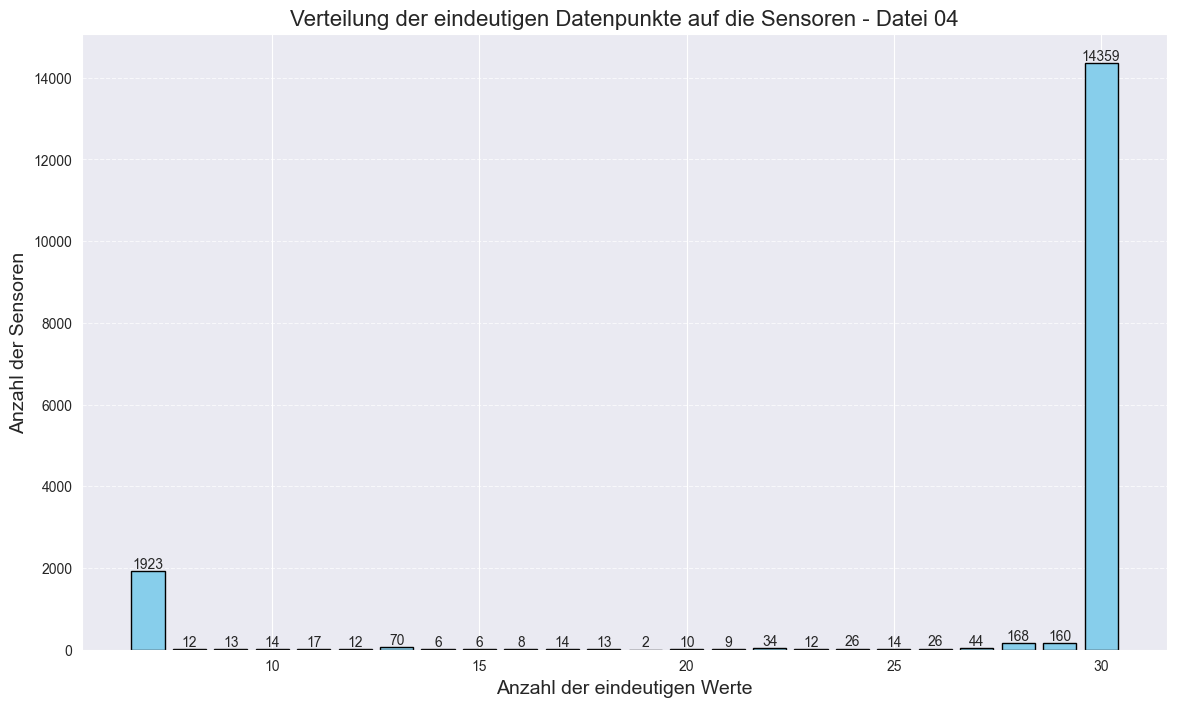

Processed and saved results for file 04


<Figure size 640x480 with 0 Axes>

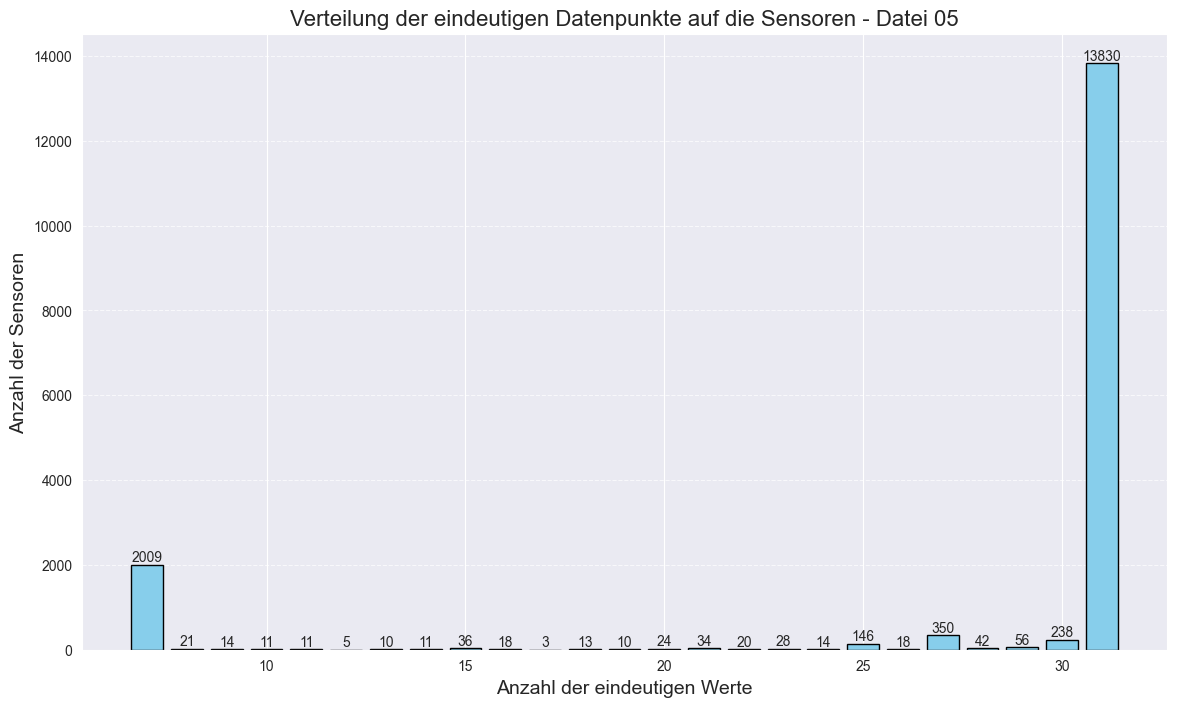

Processed and saved results for file 05


<Figure size 640x480 with 0 Axes>

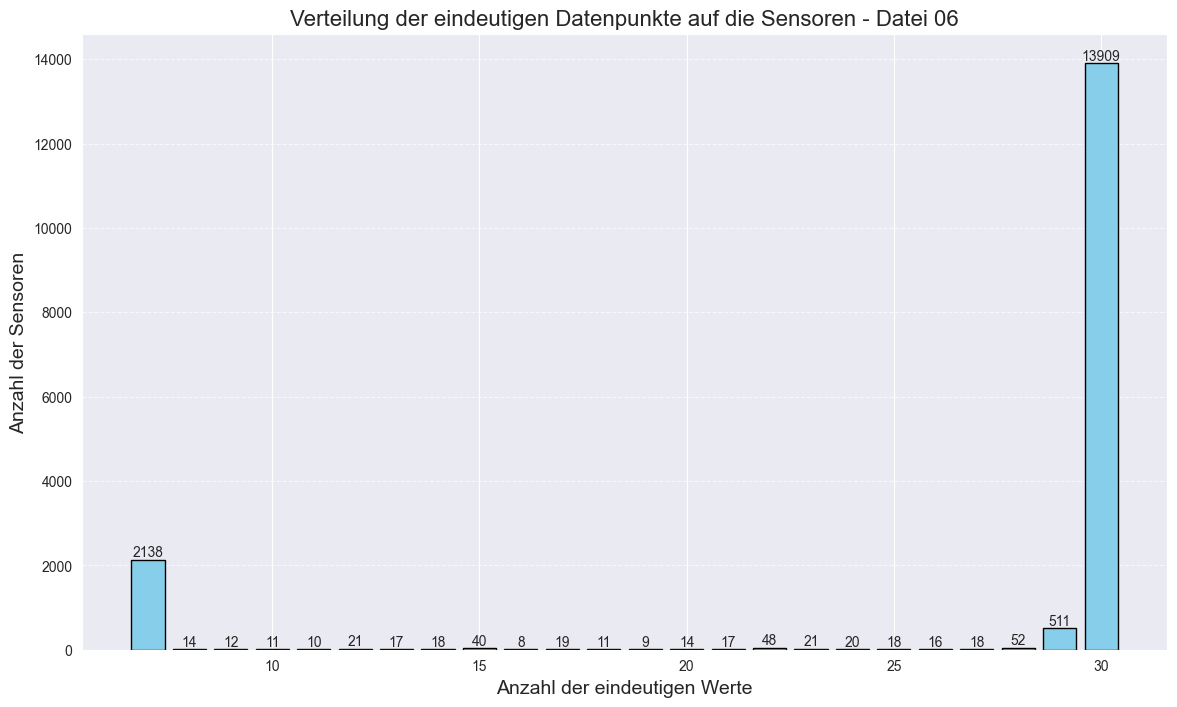

Processed and saved results for file 06


<Figure size 640x480 with 0 Axes>

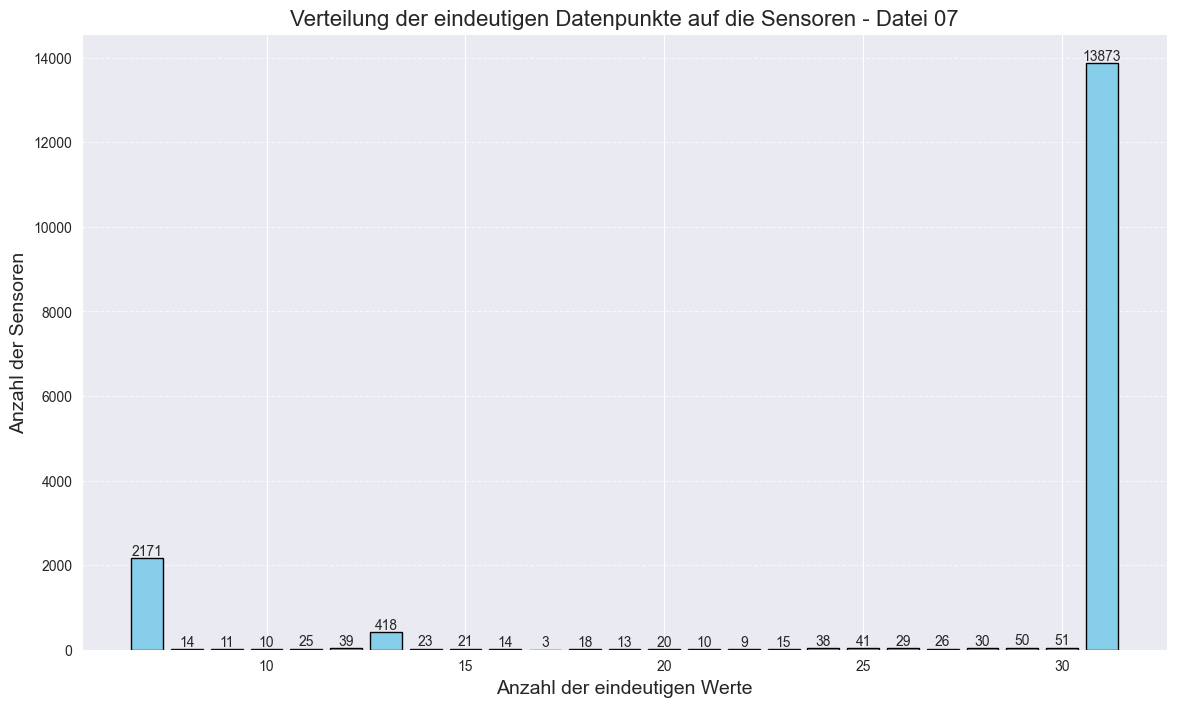

Processed and saved results for file 07


<Figure size 640x480 with 0 Axes>

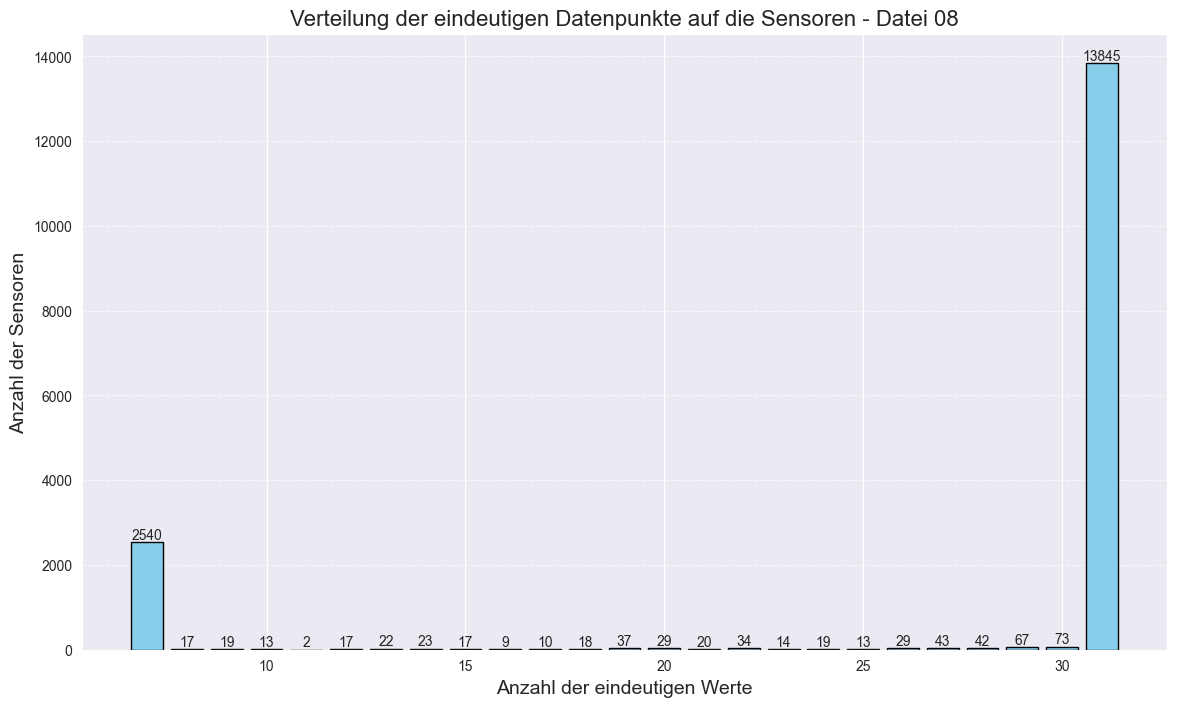

Processed and saved results for file 08


<Figure size 640x480 with 0 Axes>

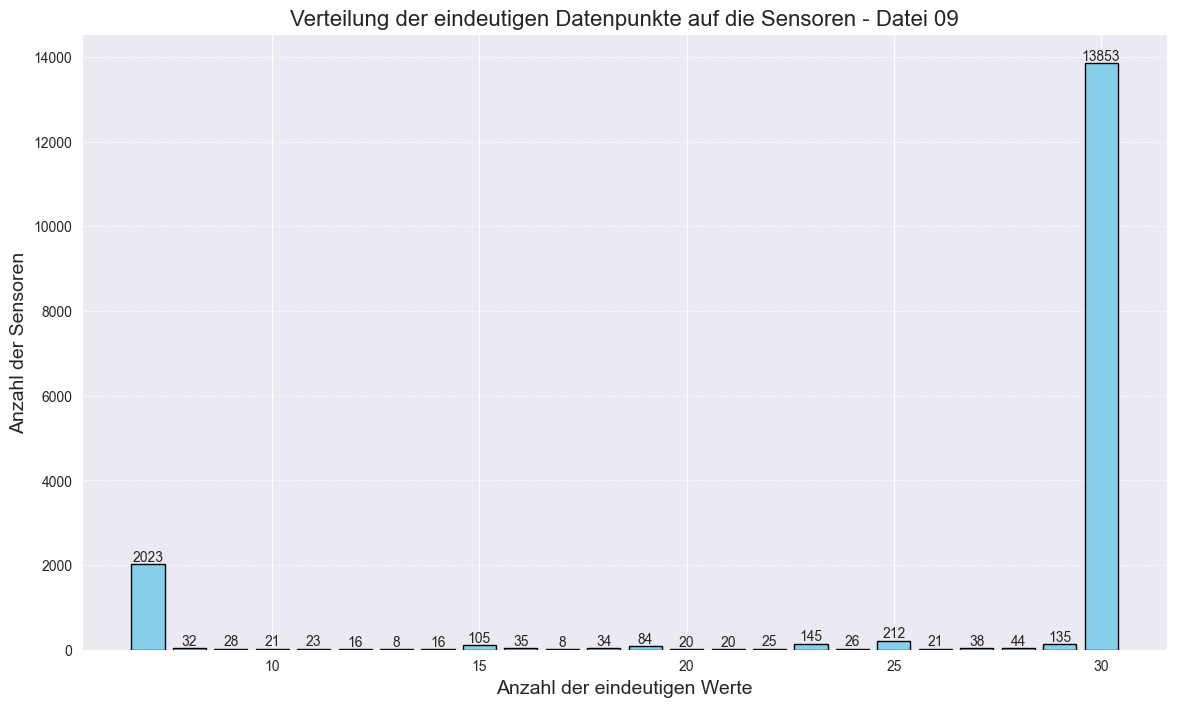

Processed and saved results for file 09


<Figure size 640x480 with 0 Axes>

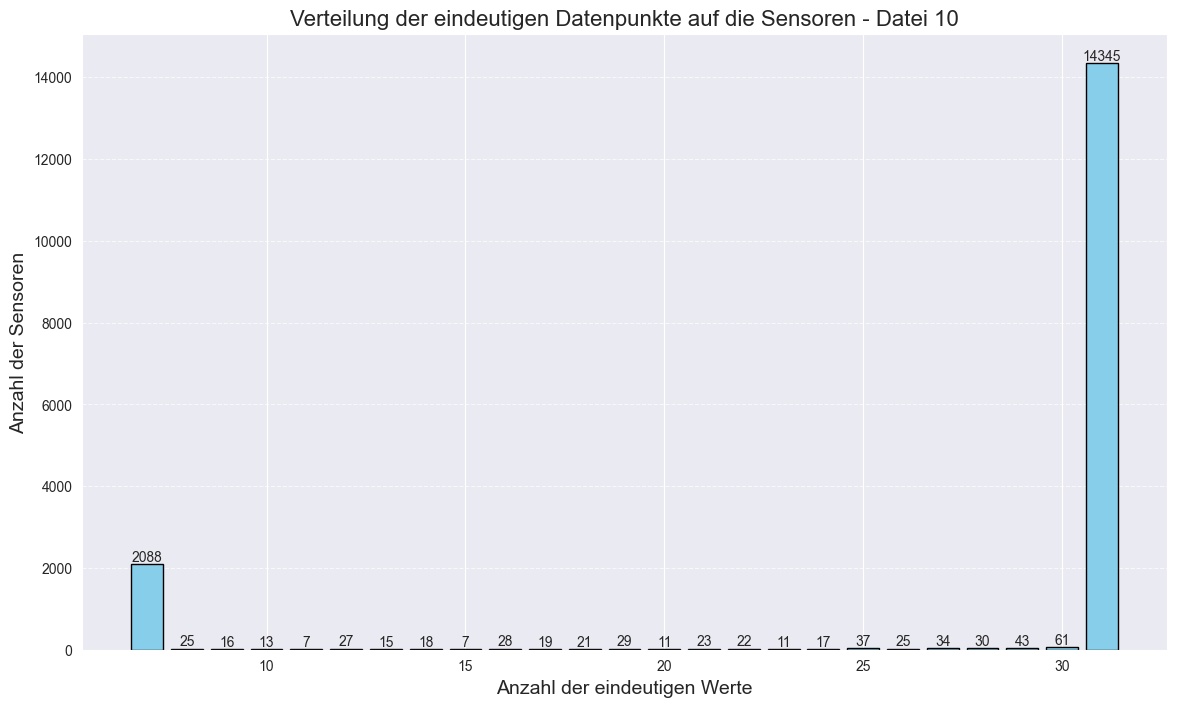

Processed and saved results for file 10


<Figure size 640x480 with 0 Axes>

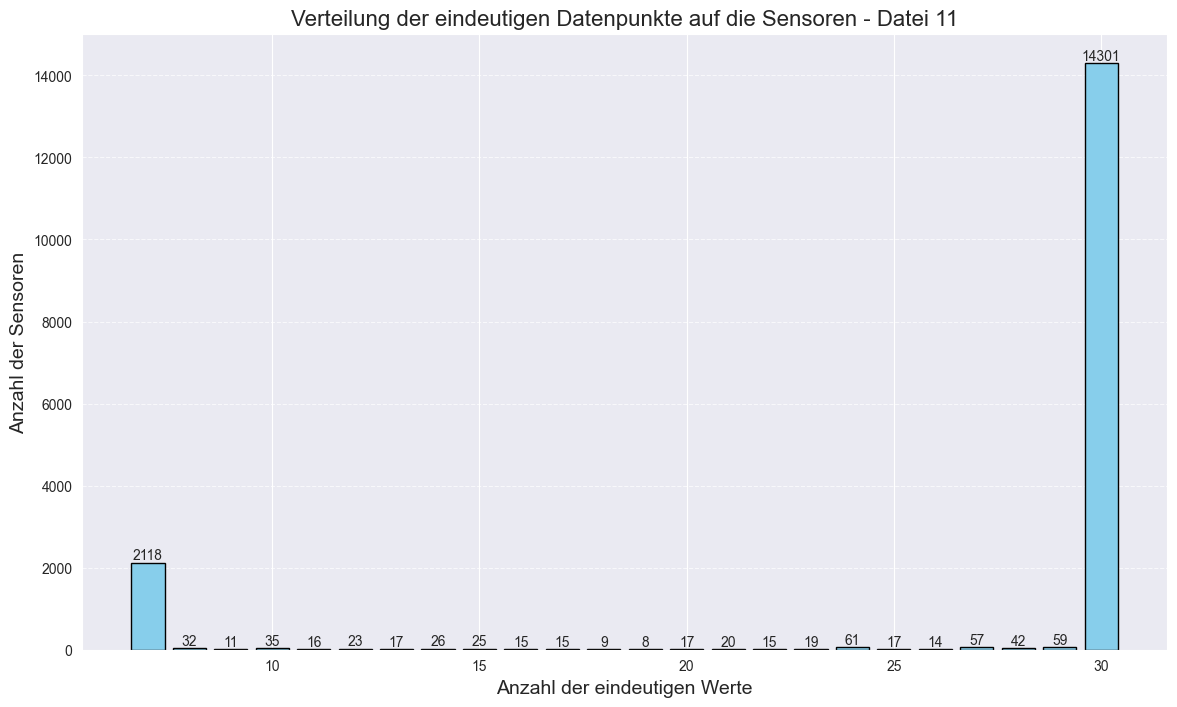

Processed and saved results for file 11


<Figure size 640x480 with 0 Axes>

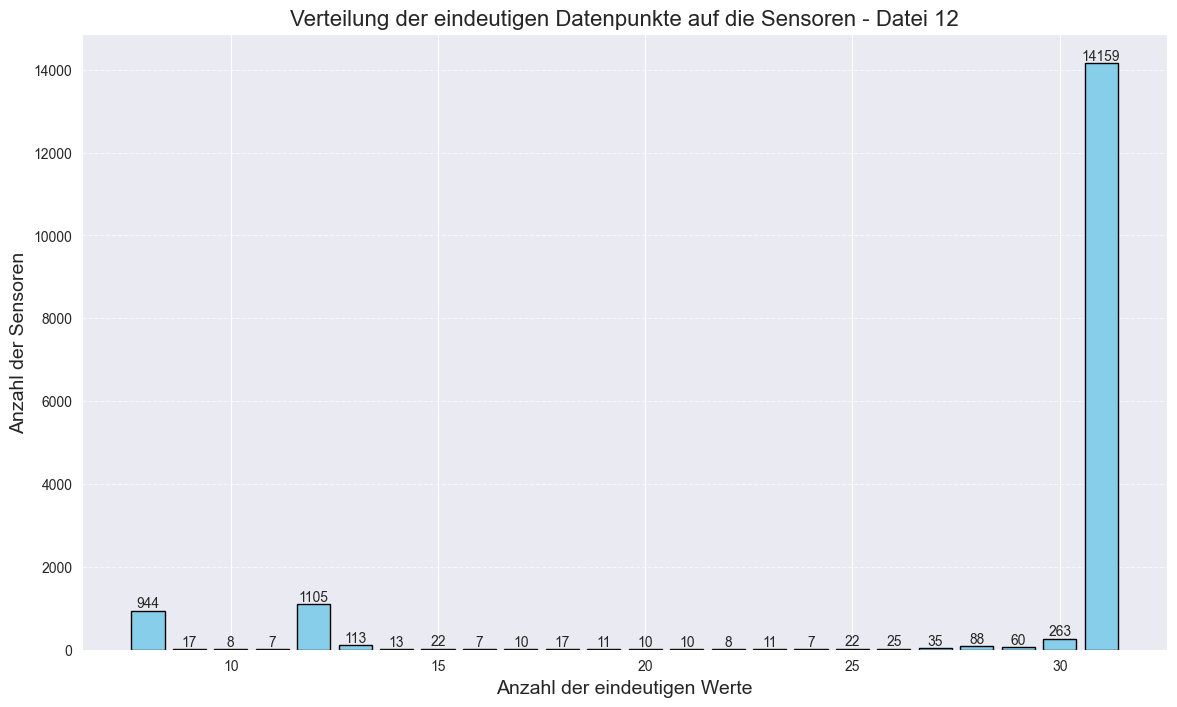

Processed and saved results for file 12


<Figure size 640x480 with 0 Axes>

In [6]:
# Loop through each file path one by one
for i, file_path in enumerate(file_paths, start=1):
    # Load data
    data = np.load(file_path)
    
    # Get the number of days for the current month
    days = days_in_month[i - 1]
    
    # Reshape data based on days in the month
    reshaped_data = data.reshape(days, 288, 16972, 3)

    # Calculate unique data counts for each sensor
    unique_data_counts = [len(np.unique(reshaped_data[:, :, sensor_id, :], axis=0)) for sensor_id in range(reshaped_data.shape[2])]
    unique_data_distribution = Counter(unique_data_counts)

    # Prepare data for saving: unique values per sensor
    sensor_unique_data = [(sensor_id, unique_data_counts[sensor_id]) for sensor_id in range(len(unique_data_counts))]
    output_file = os.path.join(output_dir, f'sensor_unique_data_{i:02}.npy')
    np.save(output_file, sensor_unique_data)

    # Plot the distribution of unique values per sensor
    x_values = sorted(unique_data_distribution.keys())
    y_values = [unique_data_distribution[count] for count in x_values]

    plt.figure(figsize=(14, 8))
    bars = plt.bar(x_values, y_values, color='skyblue', edgecolor='black')
    plt.xlabel("Anzahl der eindeutigen Werte", fontsize=14)
    plt.ylabel("Anzahl der Sensoren", fontsize=14)
    plt.title(f"Verteilung der eindeutigen Datenpunkte auf die Sensoren - Datei {i:02}", fontsize=16)

    # Add data labels above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

    # Add a grid for the y-axis with a lighter style
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Save the plot
    plot_output_file = f'/Users/bugragorkem/Desktop/Uni/5. Semester /Data Science Projekt/Datenpunkte_{i:02}.svg'
    plt.savefig(plot_output_file)
    plt.show()

    # Clear the plot to free memory
    plt.clf()
    
    # Print confirmation message
    print(f"Processed and saved results for file {i:02}")